In [3]:
import pandas as pd
data = pd.read_csv('Twitter_Data.csv')
print(data.head())
print(data.info())
print(data['category'].value_counts())


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


In [5]:
data['clean_text'] = data['clean_text'].fillna("")
data.dropna(subset=['category'], inplace=True)


In [12]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

def clean_text(text):
    text = re.sub(r'http\\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in words if word not in stop_words])

data['cleaned_text'] = data['clean_text'].apply(clean_text)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Rename 'category' column to 'sentiment'
data.rename(columns={'category': 'sentiment'}, inplace=True)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['sentiment']


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\\n", classification_report(y_test, y_pred))


Accuracy: 0.8905353581837705
Classification Report:\n               precision    recall  f1-score   support

        -1.0       0.88      0.78      0.83      7230
         0.0       0.86      0.97      0.91     10961
         1.0       0.92      0.89      0.90     14404

    accuracy                           0.89     32595
   macro avg       0.89      0.88      0.88     32595
weighted avg       0.89      0.89      0.89     32595



C:\Users\VICTUS\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


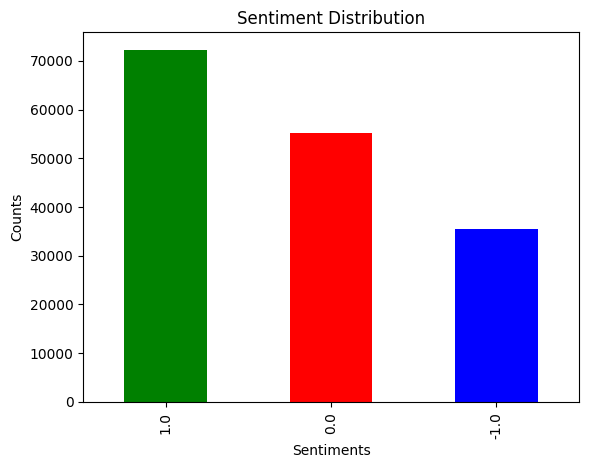

In [15]:
import matplotlib.pyplot as plt

data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiments")
plt.ylabel("Counts")
plt.show()


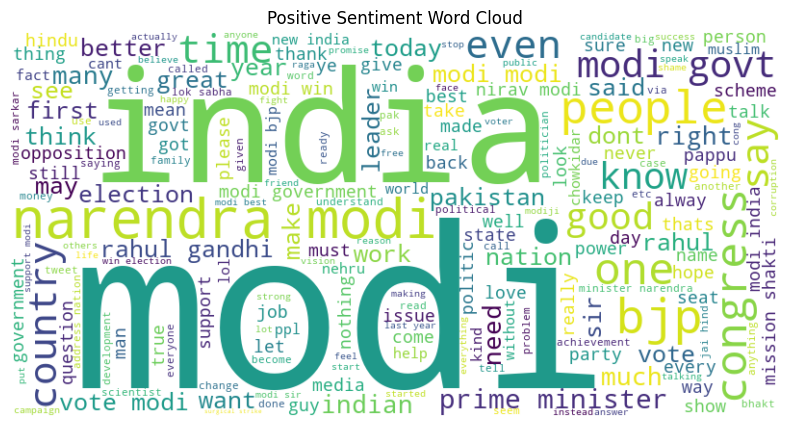

In [19]:
from wordcloud import WordCloud

positive_text = ' '.join(data[data['sentiment'] == 1.0]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")
plt.show()
